# Regularização L1 e L2.

## Os parâmetros L1 e L2.
Como já sabemos uma regressão linear tenta ajustar uma função linear aos dados:
$$y_i = b + w_1 \cdot x_{i1} + ... + w_p \cdot x_{ip} = w x_i$$

Procedimento de ajuste envolve a função de custo como soma residual dos quadrados ou RSS. Os coeficientes w são escolhidos para minimizar essa função de custo com base nos dados de treinamento.
$$RSS = \sum^{n}{i=1}[y_i - (w \cdot x_i + b)]^2$$

No entanto, pode ocorrer overfitting, ou seja, o modelo pode "memorizar" o ruido dos dados de treinamento. Nesse caso, dizemos que o modelo tem um erro de generalização elevado, esse fenômeno está associado á variância do modelo, como vimos acima, portanto, uma forma de diminuir o erro é aumentar a bias.
$\newline$ Para isso, regularizamos os coeficientes w, ou seja, restringimos o seu tamanho. Isso é feito adicionando um termo da função de custo, de forma que minimizar a função de custo automaticamente minimize também os coeficientes.

## Lasso (L1).
$$RSS_{lasso} = \sum^{n}_{i=1} [y_i - (w \cdot x_i + b)]^2, + \alpha \sum^{p}_{j=1}|w_j|$$

Além de diminuir a variância do modelo, essa regularização tem uma outra importancia aplicação em machine learning. Quando há mútiplas features altamente correlacionadas (ou seja, features que se comportam da mesma maneira) a regularização Lasso seleciona apenas uma dessas features e zera os coeficientes das outras, de forma minimizar a penalidade L1. Desse modo, dizemos que esse modelo realiza feature e selection automaticamente, gerando varios coeficientes com o peso zero, ou seja, que são ignorados pelo modelo. Isso facilita a interpretação do modelo, o que é uma enorme vantagem.

## Ridge (L2).
$$RSS_{ridge} = \sum^{n}_{i=1}[y_i - (w \cdot x_i + b)] + \sum^{p}_{j=1} w^2_j$$

Nesse caso, a penalização consiste nos quadrados dos coeficientes, ao invés de seus módulos. Qual será o efeito dessa regularização nos coeficientes de duas features altamente correlacionadas? Poderiamos ter duas features com coeficientes parecidos, ou uma com coeficientes altos, em outras com coeficientes zero. Como penalidade L2 é desproporcionalmente maior para coeficientes maiores, a regularização Ridge faz com que features correlacionadas tenham coeficientes parecidos.
$\newline$ No entanto, essa regularização não diminui a susceptibilidade do modelo a outliers, de forma que é recomendável limpar o dataset remover features desnecessárias antes de realizar esse tipo de regressão. Em termos matemáticos, a penalidade L1 não é diferenciável, o que pode complicar a sua implementação. Já a L2 é diferenciável, o que significa que ela pode ser usada em abordagens baseadas em gradiente.

# Prática.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge


In [11]:
data = pd.read_csv('column_2C_weka.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [13]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


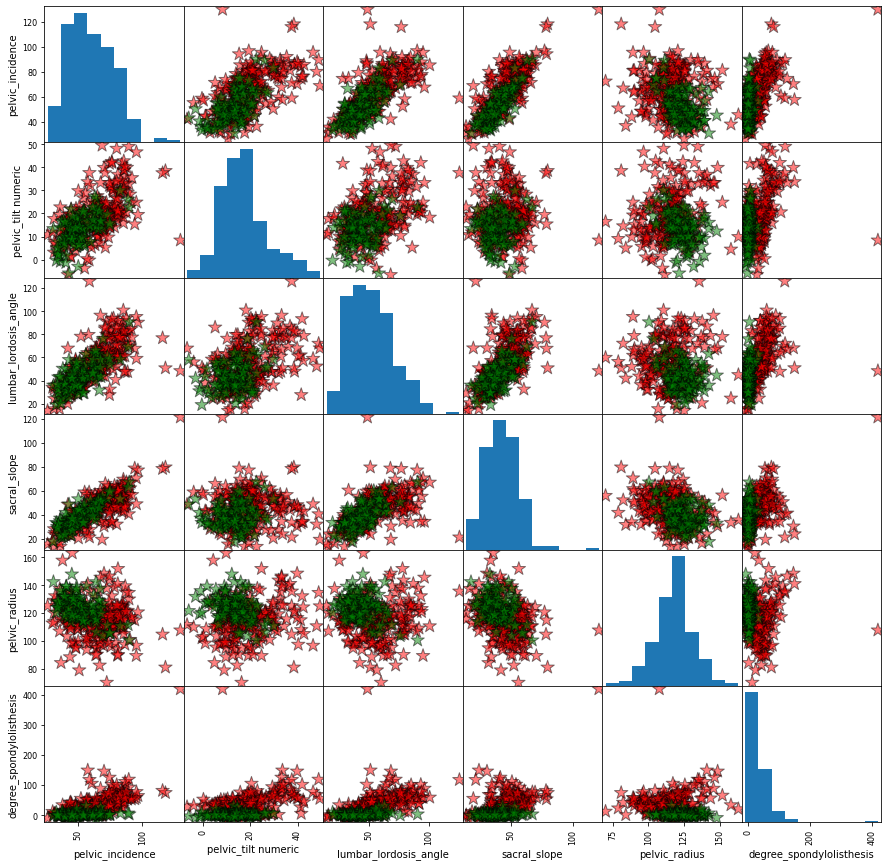

In [14]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

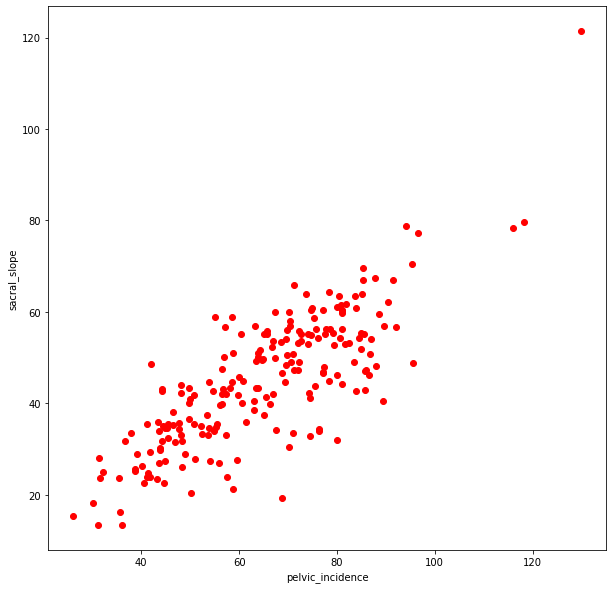

In [15]:
data1 = data[data['class'] == 'Abnormal']
x = np.array(data1.loc[:, 'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:, 'sacral_slope']).reshape(-1,1)

plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y,color = 'r')
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.5608287918841997
